In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
f4 = pd.read_csv("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/CC_2020.csv")

In [16]:
f4['Date'] = pd.to_datetime(f4['Date'])

In [17]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ExponentialSmoothing

In [18]:
f4

,Date,CC
0,2020-03-26,0.000490
1,2020-03-27,0.017949
2,2020-03-28,0.035408
3,2020-03-29,0.052867
4,2020-03-30,0.070327
...,...,...
111,2020-07-15,90.812000
112,2020-07-16,91.734000
113,2020-07-17,92.656000
114,2020-07-18,93.578000


In [19]:
data2 = f4.copy()

In [20]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2.index = data2['Date']

In [21]:
data2.drop(['Date'], axis = 1,inplace = True)

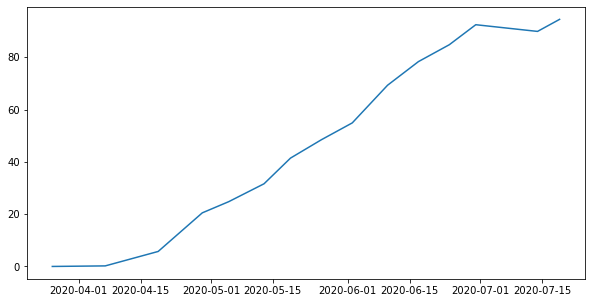

In [22]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plt.plot(data2['CC'])

In [23]:
ad_fuller_result = adfuller(data2['CC'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.6723398290690231
p-value: 0.8537846580909019


In [24]:
data2['CC'] = np.log(data2['CC'])
data2['CC_log_diff'] = data2['CC'] - data2['CC'].shift(1)

In [25]:
data2 = data2.dropna()

In [26]:
ad_fuller_result = adfuller(data2['CC_log_diff'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -17.19808496519131
p-value: 6.486610016704656e-30


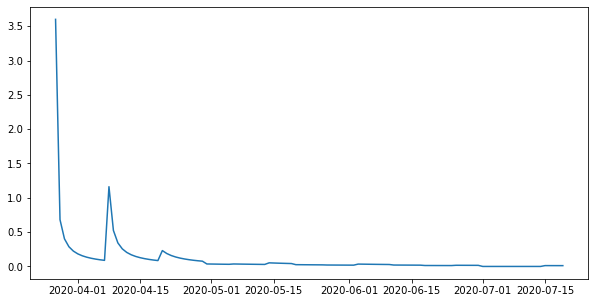

In [27]:
plt.plot(data2['CC_log_diff'])

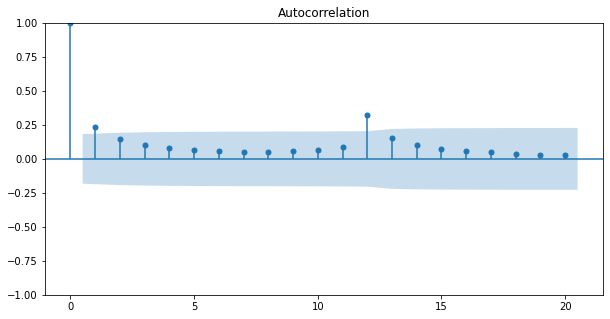

In [28]:
sm.graphics.tsa.plot_acf(data2['CC_log_diff'].values.squeeze(), lags=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


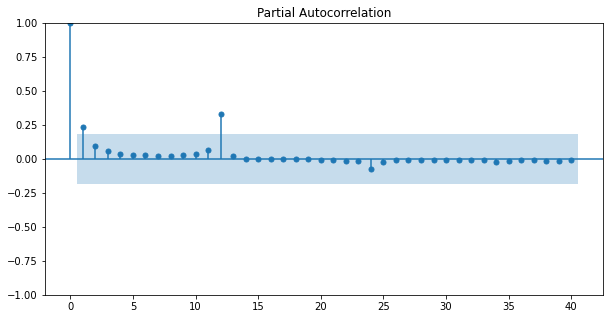

In [29]:
sm.graphics.tsa.plot_pacf(data2['CC_log_diff'].values.squeeze(), lags=40)
plt.show()

In [18]:
# p can be 1
# q value can be 1
# D is 1
# ARIMA model

In [30]:
train_data = data2[:50]
train_data_1 = train_data['CC']
train_data_1

Date
2020-03-27   -4.020212
2020-03-28   -3.340808
2020-03-29   -2.939966
2020-03-30   -2.654604
2020-03-31   -2.432855
2020-04-01   -2.251464
2020-04-02   -2.097979
2020-04-03   -1.964947
2020-04-04   -1.847552
2020-04-05   -1.742503
2020-04-06   -1.647447
2020-04-07   -1.560648
2020-04-08   -0.399856
2020-04-09    0.122955
2020-04-10    0.464520
2020-04-11    0.718652
2020-04-12    0.921112
2020-04-13    1.089403
2020-04-14    1.233410
2020-04-15    1.359266
2020-04-16    1.471038
2020-04-17    1.571563
2020-04-18    1.662900
2020-04-19    1.746588
2020-04-20    1.975677
2020-04-21    2.161943
2020-04-22    2.318901
2020-04-23    2.454533
2020-04-24    2.573947
2020-04-25    2.680610
2020-04-26    2.776985
2020-04-27    2.864883
2020-04-28    2.945675
2020-04-29    3.020425
2020-04-30    3.054630
2020-05-01    3.087704
2020-05-02    3.119718
2020-05-03    3.150740
2020-05-04    3.180828
2020-05-05    3.210037
2020-05-06    3.243959
2020-05-07    3.276767
2020-05-08    3.308534
2020-0

In [31]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_1, order = (1,1,1))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [32]:
print (model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     CC   No. Observations:                   50
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  15.641
Date:                Wed, 03 Aug 2022   AIC                            -25.283
Time:                        11:08:40   BIC                            -19.607
Sample:                    03-27-2020   HQIC                           -23.129
                         - 05-15-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9104      0.103      8.857      0.000       0.709       1.112
ma.L1         -0.4003      0.328     -1.222      0.222      -1.043       0.242
sigma2         0.0303      0.002     15.711      0.0

<AxesSubplot:xlabel='Date'>

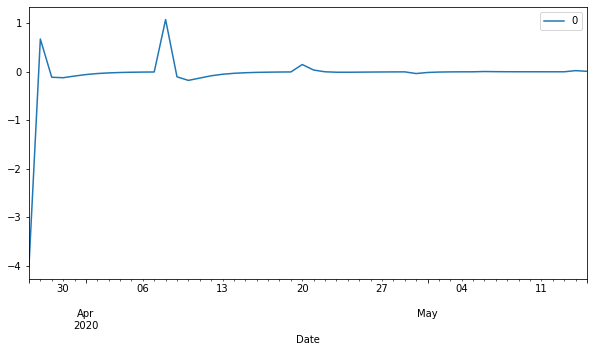

In [33]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

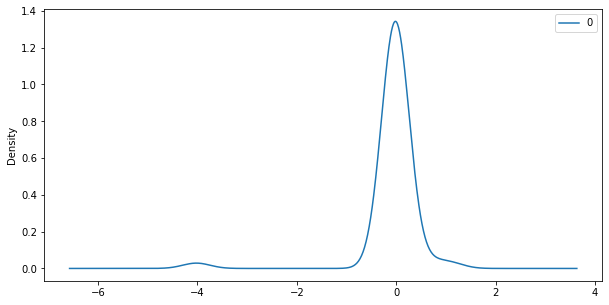

In [34]:
residuals.plot(kind='kde')

In [35]:
residuals.describe()

,0
count,50.000000
mean,-0.061798
std,0.601603
min,-4.020212
25%,-0.026307
50%,-0.002623
75%,0.003009
max,1.081366


In [37]:
model_pred = model_fit.forecast(steps = 10)
model_pred

2020-05-16    3.590913
2020-05-17    3.626069
2020-05-18    3.658075
2020-05-19    3.687212
2020-05-20    3.713737
2020-05-21    3.737885
2020-05-22    3.759869
2020-05-23    3.779882
2020-05-24    3.798102
2020-05-25    3.814689
Freq: D, Name: predicted_mean, dtype: float64

In [36]:
test_data = data2[50:60]
test_data_1 = test_data['CC']
test_data_1

Date
2020-05-16    3.598134
2020-05-17    3.641963
2020-05-18    3.683951
2020-05-19    3.724247
2020-05-20    3.748159
2020-05-21    3.771512
2020-05-22    3.794333
2020-05-23    3.816644
2020-05-24    3.838469
2020-05-25    3.859827
Name: CC, dtype: float64

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
model_pred_1 = np.exp(model_pred)
test_data_2 = np.exp(test_data_1)
print (model_pred_1)
print (test_data_2)
rmse = sqrt(mean_squared_error(test_data_2, model_pred_1))
print('Test RMSE: %.3f' % rmse)

2020-05-16    36.267179
2020-05-17    37.564875
2020-05-18    38.786598
2020-05-19    39.933342
2020-05-20    41.006764
2020-05-21    42.009049
2020-05-22    42.942792
2020-05-23    43.810882
2020-05-24    44.616419
2020-05-25    45.362631
Freq: D, Name: predicted_mean, dtype: float64
Date
2020-05-16    36.530000
2020-05-17    38.166667
2020-05-18    39.803333
2020-05-19    41.440000
2020-05-20    42.442857
2020-05-21    43.445714
2020-05-22    44.448571
2020-05-23    45.451429
2020-05-24    46.454286
2020-05-25    47.457143
Name: CC, dtype: float64
Test RMSE: 1.435
